In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
from LocKMeans import LocKMeans

In [3]:
from sklearn.cluster import KMeans

In [4]:
import time

## 1. Comparing results with standard KMeans clustering

In [5]:
np.random.seed(1234)
n_cluster = 10
points_in_cluster = 100
n_sample_arr = np.repeat(points_in_cluster, n_cluster)
cluster_std_arr = np.random.rand(n_cluster)*2 + 1

In [6]:
X, y, centers = make_blobs(n_samples = n_sample_arr, cluster_std = cluster_std_arr, return_centers = True)

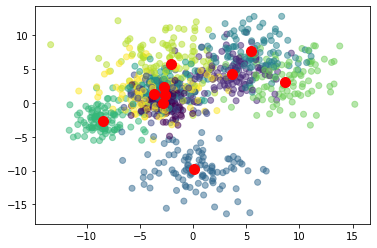

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5)
plt.scatter(centers[:,0], centers[:,1], s=100, c="red")
plt.show()

In [8]:
lkm = LocKMeans(n_clusters=n_cluster, cluster_size=points_in_cluster, max_iter=100)
lkm.fit(X)
labels = lkm.predict(X)
cluster_centers = lkm.cluster_centers_

100%|██████████| 1000/1000 [00:00<00:00, 162879.27it/s]


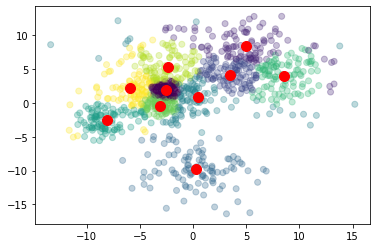

In [9]:
plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.3)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s=100, c="red")
plt.show()

In [10]:
unique_elements, counts_elements = np.unique(labels, return_counts=True)
counts_elements

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100], dtype=int64)

In [11]:
km = KMeans(n_clusters=n_cluster)
labels = km.fit_predict(X)
kmeans_centers = km.cluster_centers_

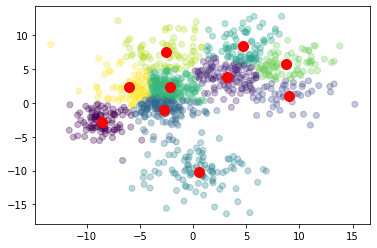

In [12]:
plt.scatter(X[:,0], X[:,1], c=labels, alpha=0.3)
plt.scatter(kmeans_centers[:,0], kmeans_centers[:,1], s=100, c="red")
plt.show()

In [13]:
unique_elements, counts_elements = np.unique(labels, return_counts=True)
counts_elements

array([ 94, 111,  47, 155,  91,  78, 187,  79,  75,  83], dtype=int64)

## 2. Comparing time efficiency

In [14]:
n_cluster = 1000
points_in_cluster = 100
n_sample_arr = np.repeat(points_in_cluster, n_cluster)
cluster_std_arr = np.random.rand(n_cluster)*10

In [13]:
X, y, centers = make_blobs(n_samples = n_sample_arr, cluster_std = cluster_std_arr, return_centers = True)

In [14]:
lkm = LocKMeans(n_clusters=n_cluster, cluster_size=points_in_cluster, max_iter=100, hide_pbar=True)
start = time.time()
lkm.fit(X)
print(f"Fitting took {time.time() - start}s")

Fitting took 1284.7048034667969s


In [15]:
km = KMeans(n_clusters=n_cluster, max_iter=100)
start = time.time()
labels = km.fit(X)
print(f"Fitting took {time.time() - start}s")

Fitting took 698.3671269416809s
